<a href="https://colab.research.google.com/github/migel-cepele/ComputerVision/blob/main/ImageProcessingEx1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

**Before starting:**

- Create a GitHub repository to upload the solution of this exercise.
- Share this GitHub link to your professor.

**Objectives**

Generate a single Python notebook implementing and answering the following questions:

**- Task 1:** Load the built-in image 'coffee' of the skimage libraries. Details can be found at https://scikit-image.org/docs/stable/auto_examples/data/plot_general.html#sphx-glr-auto-examples-data-plot-general-py

**- Task 2:** Use the skimage function random_noise to add each of the 7 different types of noise available and generate a 4x2 panel figure with the original image and the 7 corrupted versions. The noise types are:

* ‘gaussian’ Gaussian-distributed additive noise.
* ‘localvar’ Gaussian-distributed additive noise, with specified
local variance at each point of image.
* ‘poisson’ Poisson-distributed noise generated from the data.
* ‘salt’ Replaces random pixels with 1.
* ‘pepper’ Replaces random pixels with 0 (for unsigned images) or
-1 (for signed images).
* ‘s&p’ Replaces random pixels with either 1 or low_val, where
low_val is 0 for unsigned images or -1 for signed images.
* ‘speckle’ Multiplicative noise using out = image + n*image, where
n is Gaussian noise with specified mean & variance.

Documentation of the function can be found at
https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.random_noise

**- Task 3:** Select one of the noise types and generate 3 noisy images with different noise intensity levels. Represent the original image along with them in a 2x2 figure.

**- Task 4: **The standard deviation for Gaussian kernel affects the behavior of the gaussian filter (parameter sigma, see documentation https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian). Explore the effect of the parameter sigma when applying a gaussian filter to the tree noisy images generated in the previus task. Represent and comment the results.

**- Task 5:** Detect the edges of the bricks in the built-in image 'bricks' using a Prewitt edge detection filter. Quantify what is the fraction of the image corresponding to bricks and to edges.

**- Task 6:** Apply a high-pass filter and a low-pass filter in the frequency domain to the skimage built-in image 'grass'. Represent the results and discuss the correspondance between spatial patterns in the original image and high/low frequency components of its the Fourier transform.

**- Task 7:** Use the function binary_blobs to generate an image with random blobs: https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.binary_blobs
How many consecutive morphological erosions are needed in order to remove all the blobs? Use a disk-shaped structuring element of radius 3 pixels (footprint). https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.disk


**Task 1**

<ipython-input-3-6cb86ffddc99>:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(IC)


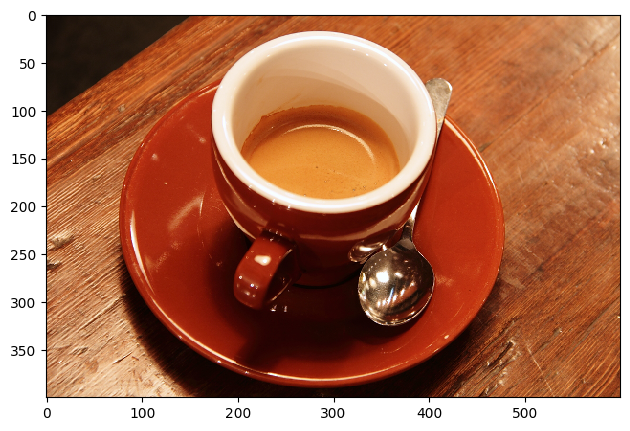

In [3]:
import skimage as sk
IC = sk.data.coffee()
sk.io.imshow(IC)

**Task 2**

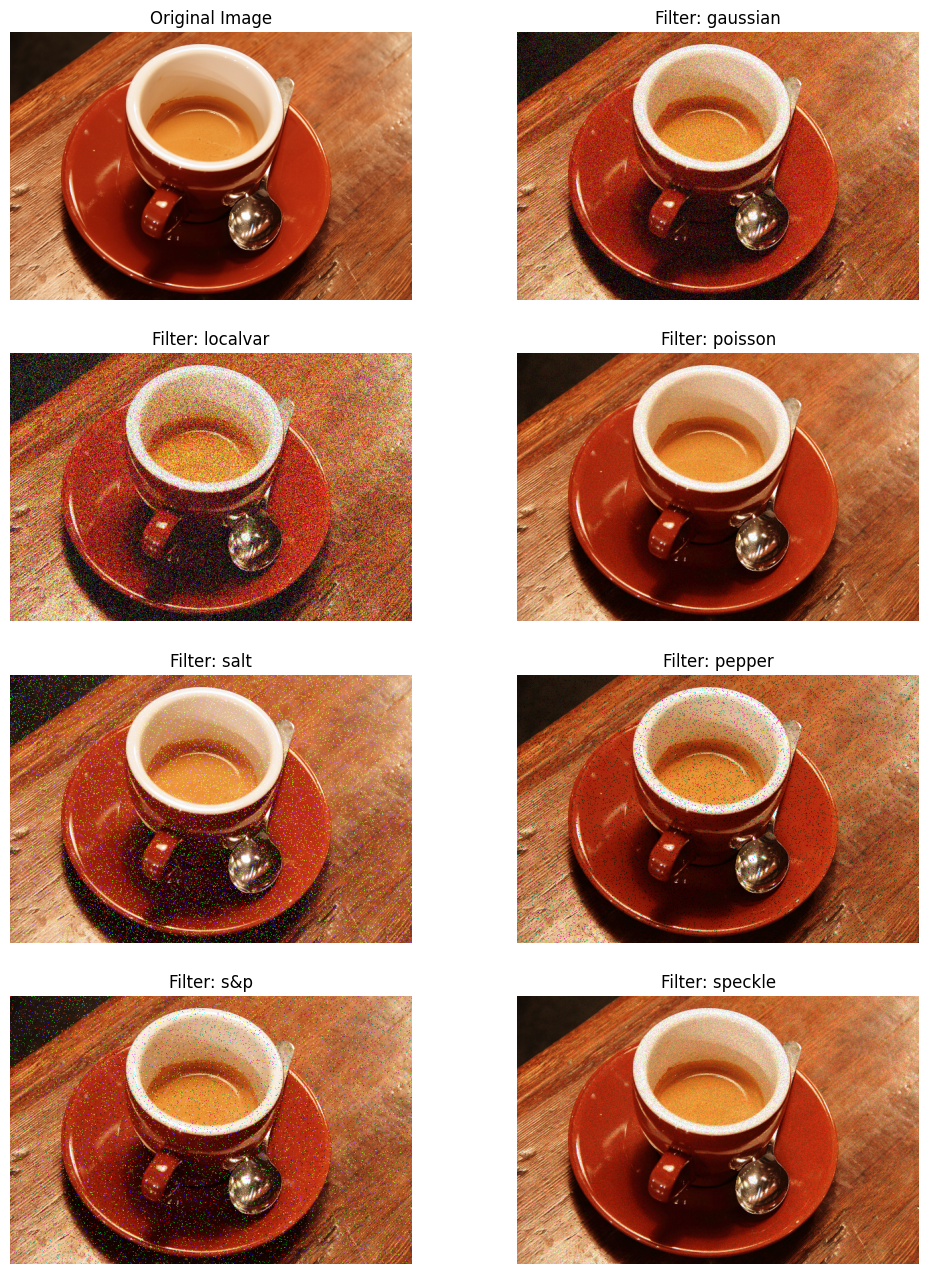

In [4]:
from os import RWF_NOWAIT
import matplotlib.pyplot as plt
from skimage.util import random_noise
import numpy as np

noise_types = ['gaussian', 'localvar', 'poisson', 'salt', 'pepper', 's&p', 'speckle'] #noise types
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,16)) #the grid with plots
axes[0,0].imshow(IC, cmap='gray')
axes[0,0].set_title('Original Image')
axes[0,0].axis('off')


for i, noise in enumerate(noise_types):

  row = (i+1) // 2
  col = (i+1) % 2

  # Add noise to the image using the specified mode
  if noise == 'localvar':
      # Generate localvar noise using a separate method
      local_variance = np.random.rand(*IC.shape) * 0.1  # Adjust variance as needed
      noisy_image = random_noise(IC, mode='gaussian', var=local_variance)
  else:
      noisy_image = random_noise(IC, noise)


  axes[row,col].imshow(noisy_image, cmap='gray')
  axes[row,col].set_title(f'Filter: {noise}')
  axes[row,col].axis('off')


**Task 3**

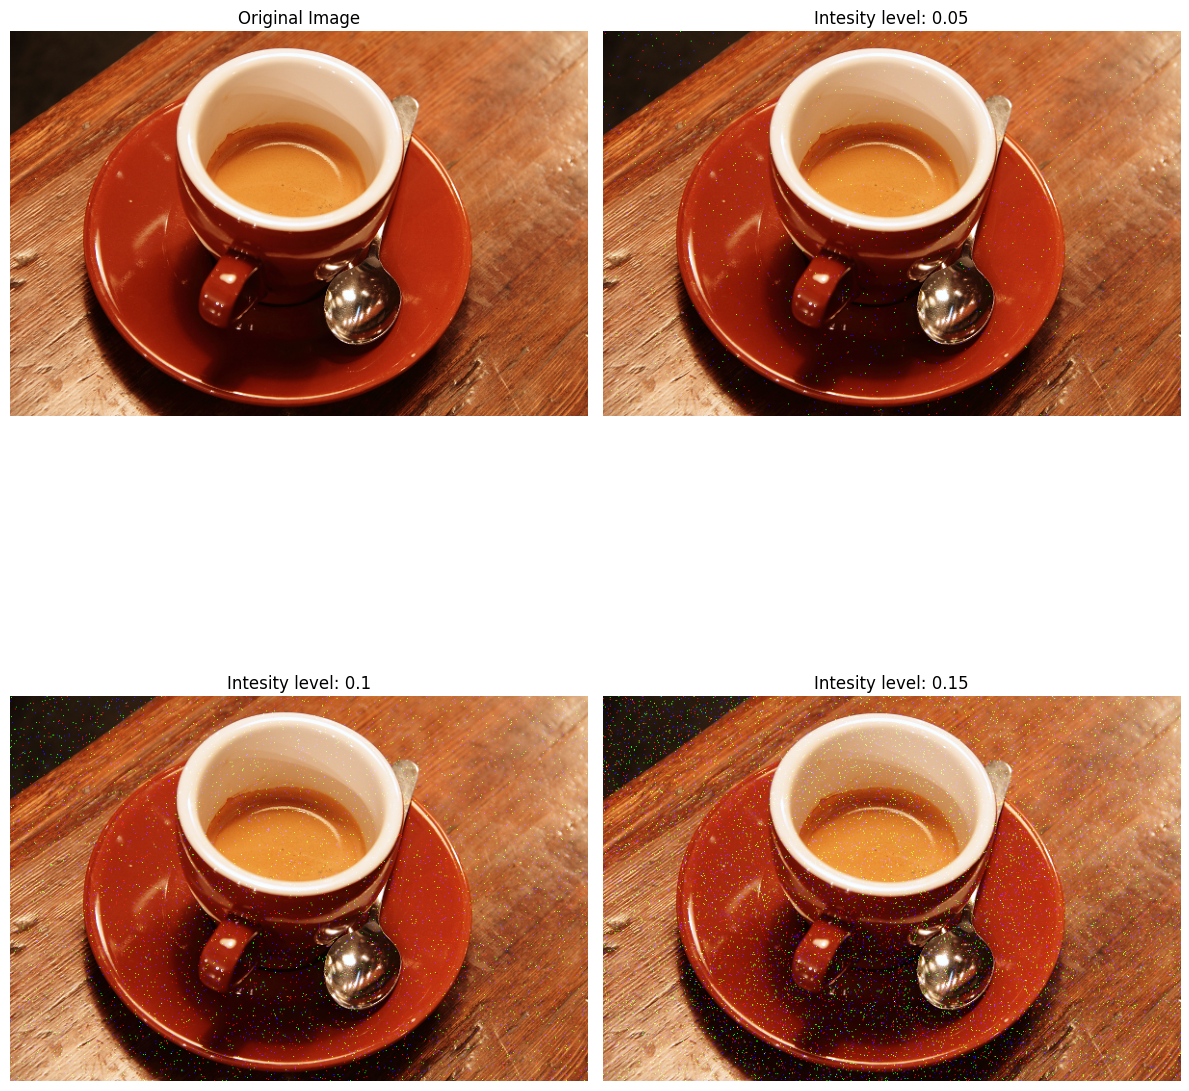

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,16)) #the grid with plots
noise_levels = [0.05, 0.1, 0.15] #std of the images
noise_type = 'salt'

axes[0,0].imshow(IC, cmap='gray')
axes[0,0].set_title('Original Image')
axes[0,0].axis('off')

for i,n_level in enumerate(noise_levels):
  row = (i+1) // 2
  col = (i+1) % 2

  # salt noise doesnt have variance parameter
  noise_image = random_noise(IC, mode=noise_type, amount=n_level**2)

  axes[row,col].imshow(noise_image, cmap='gray')
  axes[row,col].set_title(f'Intesity level: {n_level}')
  axes[row,col].axis('off')

fig.tight_layout()

**Task 4**

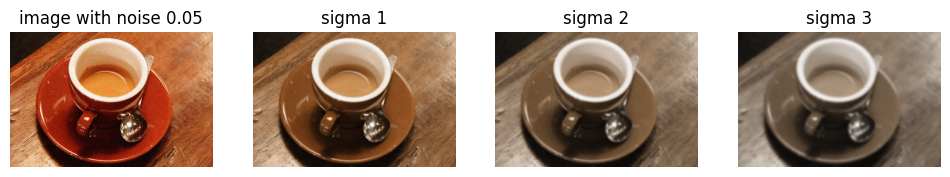

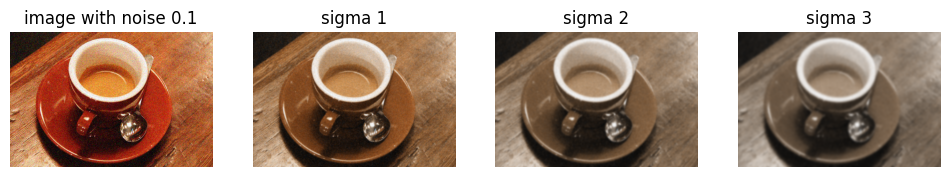

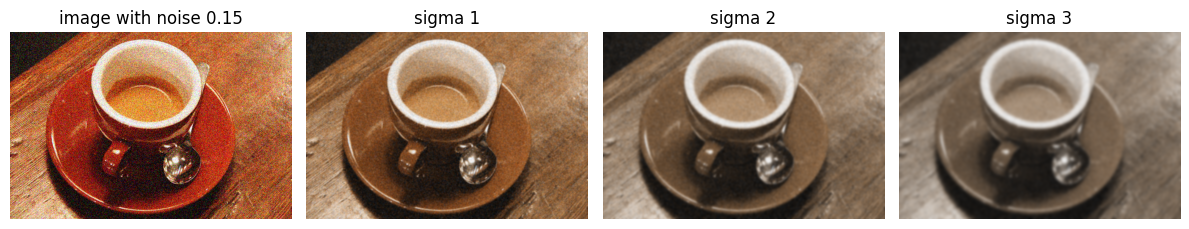

In [6]:
from skimage.filters import gaussian

std = [1, 2, 3]

for i,n_level in enumerate(noise_levels):

  fig, axes = plt.subplots(nrows=1, ncols=len(std) + 1, figsize=(12,4)) #the grid with plots
  noise_levels = [0.05, 0.1, 0.15] #std of the images
  noise_type = 'gaussian'

  # gaussian ka var parameter
  noise_image = random_noise(IC, mode=noise_type, var=n_level**2)

  axes[0].imshow(noise_image, cmap='gray')
  axes[0].set_title(f'image with noise {n_level}')
  axes[0].axis('off')

  for j, sigma in enumerate(std):
    std_image = gaussian(noise_image, sigma)
    col = (j+1)

    axes[col].imshow(std_image, cmap='gray')
    axes[col].set_title(f'sigma {sigma}')
    axes[col].axis('off')

fig.tight_layout()

# we detect that when we increase the sigma value, the image becomes more blurred,
# and conversely more smooth when we lower it

**Task 5**
Detect the edges of the bricks in the built-in image 'bricks' using a Prewitt edge detection filter. Quantify what is the fraction of the image corresponding to bricks and to edges.

Fraction of edges pixels 0.3161
Fraction of bricks pixels 0.6839


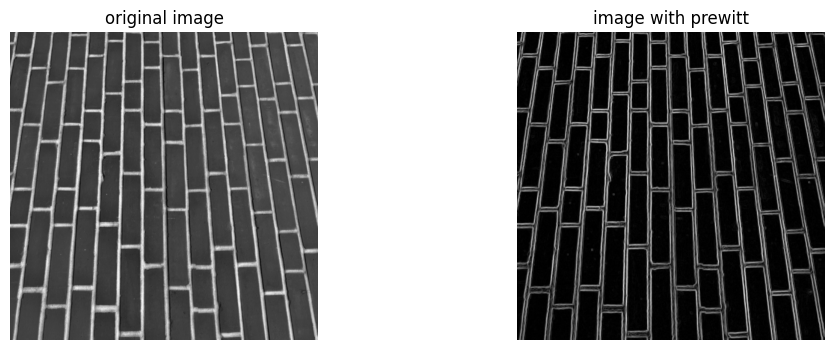

In [7]:
from skimage.filters import prewitt
import numpy as np

brick = sk.data.brick()
#sk.io.imshow(brick)

filtered_brick = prewitt(brick)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

axes[0].imshow(brick, cmap='gray')
axes[0].set_title(f'original image')
axes[0].axis('off')


axes[1].imshow(filtered_brick, cmap='gray')
axes[1].set_title(f'image with prewitt')
axes[1].axis('off')

# pixels that correnspond to edges should have higher grayscale value, that those who correnspond to bricks
total_pixels = filtered_brick.size
threshhold = filtered_brick.mean() * 0.7 #imazhi eshte ne float point, ku pixels kane vlera nga 0 ne 1
binary_edges = filtered_brick > threshhold

edge_pixels = np.sum(binary_edges)
brick_pixels = total_pixels - edge_pixels


print(f'Fraction of edges pixels {edge_pixels/total_pixels:.4f}')
print(f'Fraction of bricks pixels {brick_pixels/total_pixels:.4f}')

**Task 6**
Apply a high-pass filter and a low-pass filter in the frequency domain to the skimage built-in image 'grass'. Represent the results and discuss the correspondance between spatial patterns in the original image and high/low frequency components of its the Fourier transform.

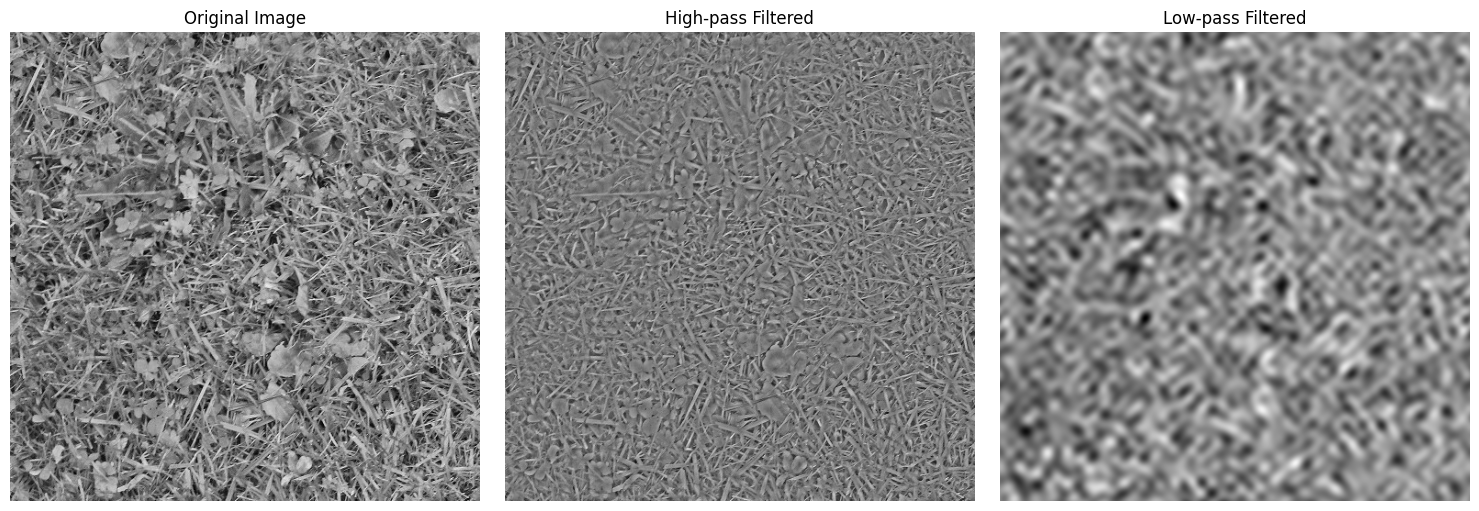

In [10]:
grass = sk.data.grass()
#sk.io.imshow(grass)

#fourier transform
img_ftt = np.fft.fft2(grass)
img_ftt_shifted = np.fft.fftshift(img_ftt)

# Create high-pass and low-pass masks
rows, cols = grass.shape
crow, ccol = rows // 2, cols // 2
mask_radius = 30  # Adjust radius for filter strength

# High-pass mask
mask_hp = np.ones((rows, cols), np.uint8)
mask_hp[crow - mask_radius:crow + mask_radius, ccol - mask_radius:ccol + mask_radius] = 0

# Low-pass mask
mask_lp = np.zeros((rows, cols), np.uint8)
mask_lp[crow - mask_radius:crow + mask_radius, ccol - mask_radius:ccol + mask_radius] = 1

# Apply masks and inverse transform
image_hp = np.fft.ifft2(np.fft.ifftshift(img_ftt_shifted * mask_hp)).real
image_lp = np.fft.ifft2(np.fft.ifftshift(img_ftt_shifted * mask_lp)).real

# Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(grass, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(image_hp, cmap='gray')
axes[1].set_title('High-pass Filtered')
axes[1].axis('off')
axes[2].imshow(image_lp, cmap='gray')
axes[2].set_title('Low-pass Filtered')
axes[2].axis('off')
plt.tight_layout()

#in the high pass filter, the image has become more sharped and the contrast is enhanced
# between adjoining areas with little variation in darkness and brightness

#in the low contrast filter, the image is more smoother. This is achieved by
#decreasing the disparity between pixels by taking the average of nearby pixels.
#This enhances low frequency information and reduces the high frequency one.


**Task 7**
Use the function binary_blobs to generate an image with random blobs: https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.binary_blobs How many consecutive morphological erosions are needed in order to remove all the blobs? Use a disk-shaped structuring element of radius 3 pixels (footprint). https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.disk

the no of erosions needed are 4


(<Axes: >, <matplotlib.image.AxesImage at 0x7ab7d03b8890>)

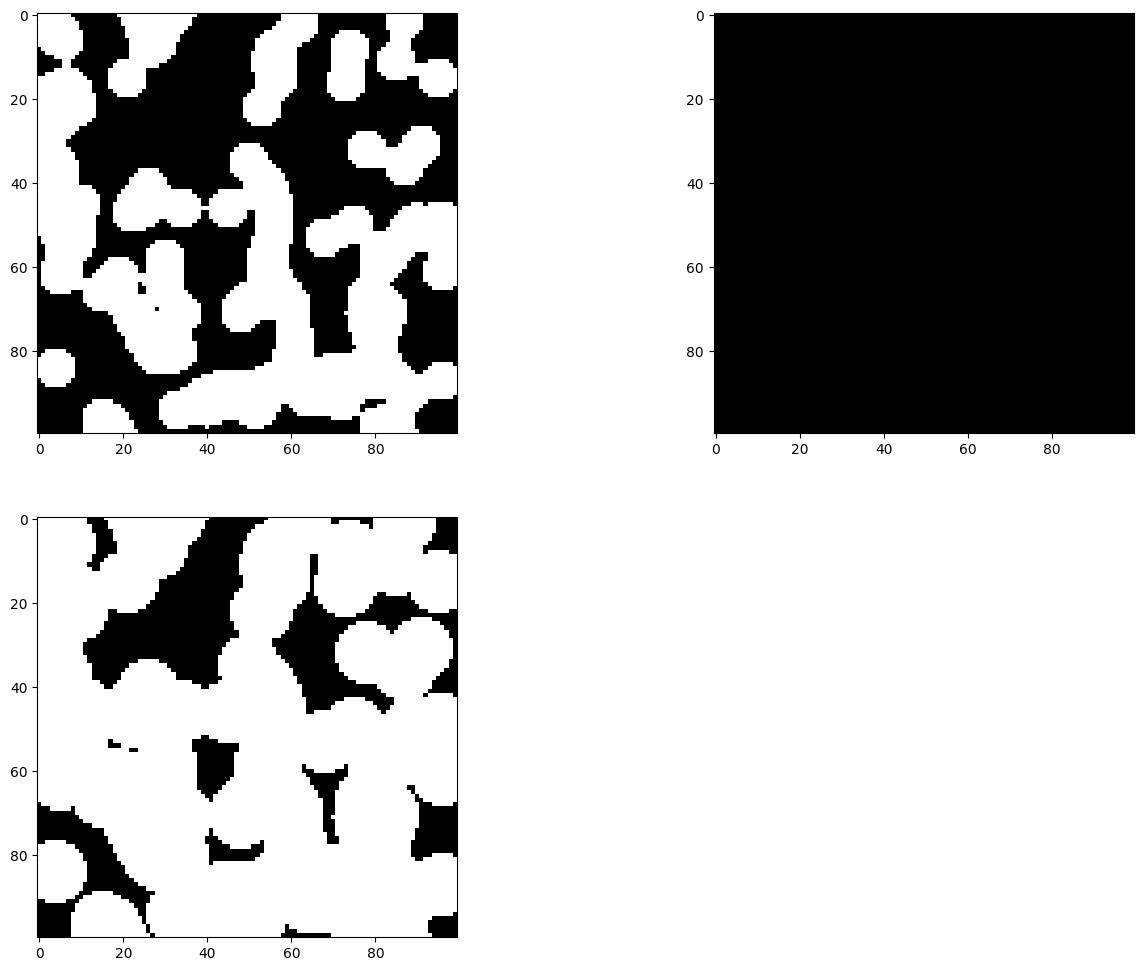

In [18]:
from skimage.morphology import erosion, dilation
from skimage.morphology import disk
blobs = sk.data.binary_blobs(length=100, blob_size_fraction=0.1)

selem = disk(3)
eroded = erosion(blobs, selem)
dilated = dilation(blobs, selem)
no_of_erosions = 1

while np.any(eroded):
  eroded = erosion(eroded, selem)
  no_of_erosions +=1

print(f'the no of erosions needed are {no_of_erosions}')

fig = plt.figure(figsize=(16, 12))
plt.subplot(221),plt.imshow(blobs, cmap = 'gray')
plt.subplot(222),plt.imshow(eroded, cmap = 'gray')
plt.subplot(223),plt.imshow(dilated, cmap = 'gray')